In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np

In [2]:
df = pd.read_csv('/content/data.csv')

HANDLING MISSING VALUE

In [3]:
# Atribut dataset
atribut = pd.DataFrame({
    'Nama Kolom': df.columns,
    'Tipe Data': df.dtypes,
    'Null': df.isnull().sum(),
})

print(atribut)

                                      Nama Kolom Tipe Data  Null
id                                            id     int64     0
diagnosis                              diagnosis    object     0
radius_mean                          radius_mean   float64     0
texture_mean                        texture_mean   float64     0
perimeter_mean                    perimeter_mean   float64     0
area_mean                              area_mean   float64     0
smoothness_mean                  smoothness_mean   float64     0
compactness_mean                compactness_mean   float64     0
concavity_mean                    concavity_mean   float64     0
concave points_mean          concave points_mean   float64     0
symmetry_mean                      symmetry_mean   float64     0
fractal_dimension_mean    fractal_dimension_mean   float64     0
radius_se                              radius_se   float64     0
texture_se                            texture_se   float64     0
perimeter_se             

In [4]:
df = df.drop(columns=['Unnamed: 32'], axis=1)

In [5]:
df = df.drop(columns=['id'], axis=1)

ENCODING

In [6]:
from IPython.display import display

# Hitung jumlah total nilai dalam kolom "diagnosis"
jumlah_total_nilai = df['diagnosis'].count()

# Buat DataFrame untuk atribut diagnosis
atribut_diagnosis = pd.DataFrame({
    'Nama Kolom': ['diagnosis'],
    'Tipe Data': [df['diagnosis'].dtype],
    'Total': [jumlah_total_nilai]
})

# Tampilkan DataFrame sebagai tabel
display(atribut_diagnosis)

,Nama Kolom,Tipe Data,Total
0,diagnosis,object,569


In [7]:
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

# Ubah tipe data atribut 'diagnosis' menjadi float
df['diagnosis'] = df['diagnosis'].astype(float)


In [8]:
# Hitung jumlah total nilai dalam kolom "diagnosis"
jumlah_total_nilai = df['diagnosis'].count()

# Buat DataFrame untuk atribut diagnosis
atribut_diagnosis = pd.DataFrame({
    'Nama Kolom': ['diagnosis'],
    'Tipe Data': [df['diagnosis'].dtype],
    'Total': [jumlah_total_nilai]
})

# Tampilkan DataFrame sebagai tabel
display(atribut_diagnosis)

,Nama Kolom,Tipe Data,Total
0,diagnosis,float64,569


SELEKSI FITUR

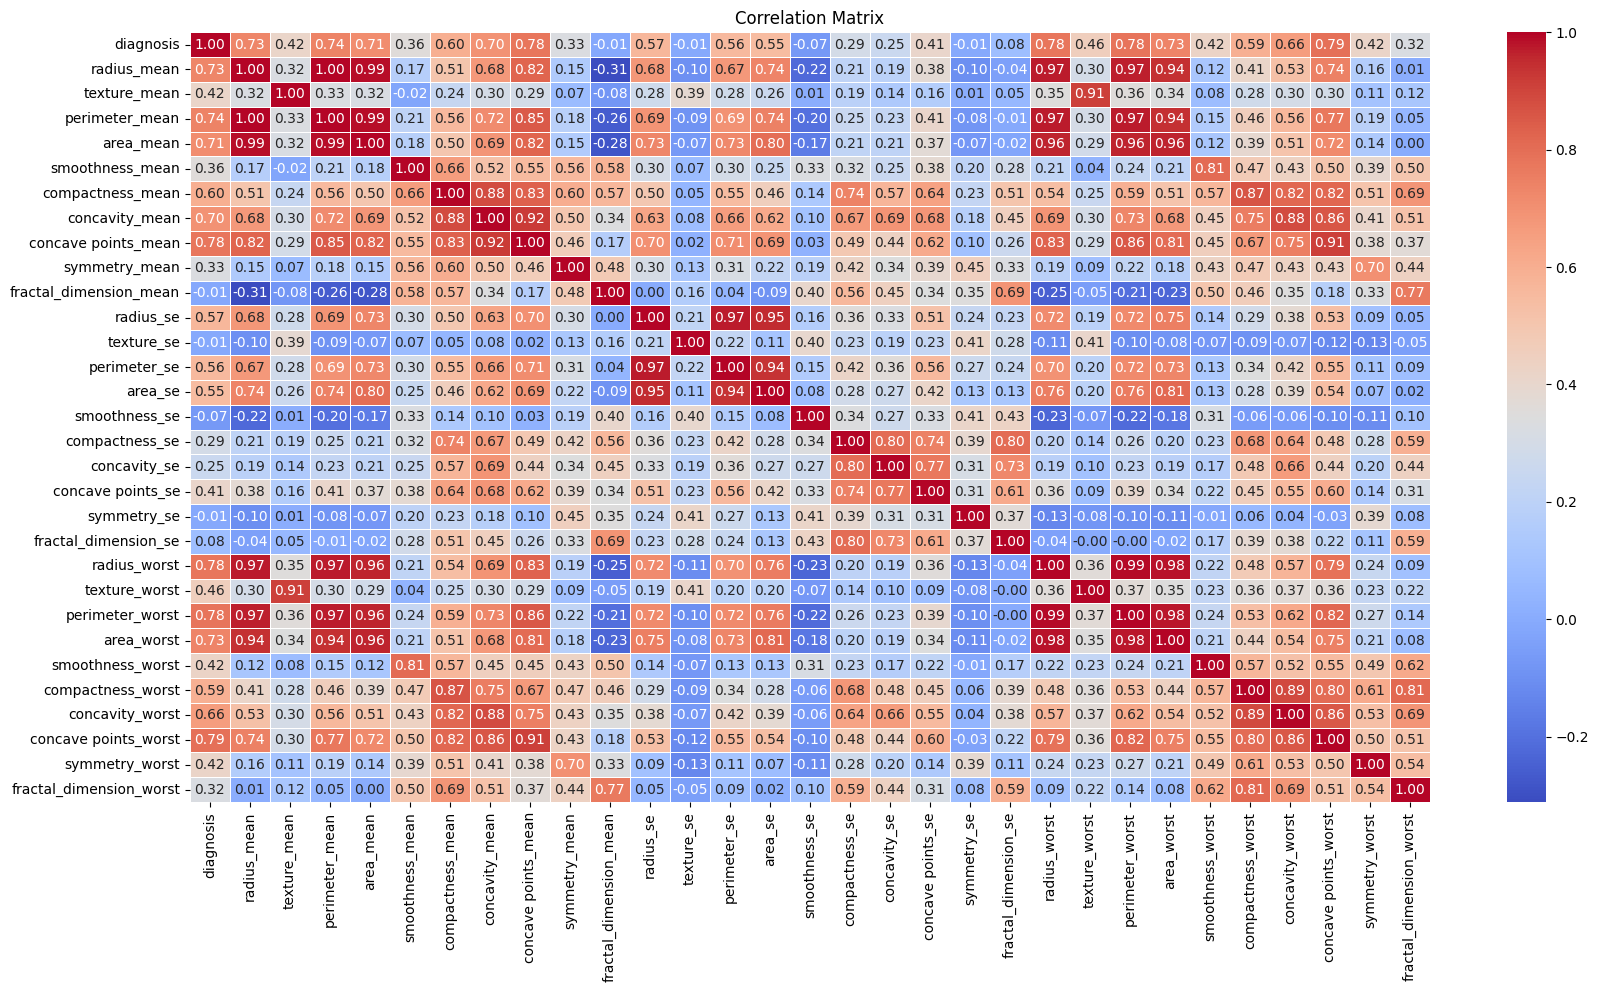

In [9]:
correlation_matrix = df.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Daftar atribut yang ingin dihapus
delete = ['fractal_dimension_mean', 'texture_se','smoothness_se','symmetry_se','fractal_dimension_se']

# Menghapus atribut yang diinginkan
df = df.drop(columns=delete)

HANDLING IMBALANCE DATA

In [11]:
#Pisahkan fitur dan target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [12]:
X= X.to_numpy()
y= y.to_numpy()

In [13]:
# Bagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [14]:
# Terapkan SMOTE hanya pada atribut 'stroke' (kelas minoritas)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

IMPLEMENTASI MODEL

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 249, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4163
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

LGBMClassifier()

In [ ]:
# Prediksi label dari data uji
y_pred = lgb_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred)


# Hitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity_gbm = tp / (tp + fn)
specificity_gbm = tn / (tn + fp)

# Menampilkan hasil
print("Akurasi:", accuracy_gbm)
print("Sensitivitas:", sensitivity_gbm)
print("Spesifisitas:", specificity_gbm )

Akurasi: 0.9532163742690059
Sensitivitas: 0.9365079365079365
Spesifisitas: 0.9629629629629629


In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Prediksi label dari data uji
y_pred = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)


# Hitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity_xgb = tp / (tp + fn)
specificity_xgb = tn / (tn + fp)

# Menampilkan hasil
print("Akurasi:", accuracy_xgb)
print("Sensitivitas:", sensitivity_xgb)
print("Spesifisitas:", specificity_xgb)

Akurasi: 0.9766081871345029
Sensitivitas: 0.9841269841269841
Spesifisitas: 0.9722222222222222


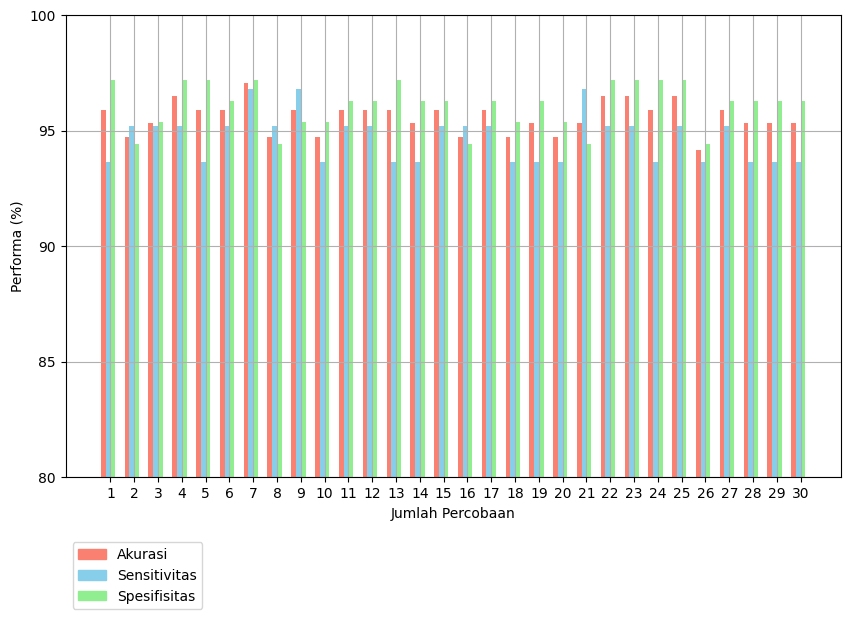

In [ ]:
#LightGBM
num_experiments = 30
accuracy = [ 0.9590, 0.9473, 0.9532, 0.9649, 0.9590, 0.9590, 0.9707, 0.9473, 0.9590, 0.9473,
             0.9590, 0.9590, 0.9590, 0.9532, 0.9590, 0.9473, 0.9590, 0.9473, 0.9532, 0.9473,
             0.9532, 0.9649, 0.9649, 0.9590, 0.9649, 0.9415, 0.9590, 0.9532, 0.9532, 0.9532
]

 # Isi dengan data akurasi dari 30 percobaan
sensitivity = [0.9365,0.9523,0.9523,0.9523,0.9365,0.9523,0.9682,0.9523,0.9682,0.9365,
               0.9523,0.9523,0.9365,0.9365,0.9523,0.9523,0.9523,0.9365,0.9365,0.9365,
               0.9682,0.9523,0.9523,0.9365,0.9523,0.9365,0.9523,0.9365,0.9365,0.9365]


 # Isi dengan data presisi dari 30 percobaan
specificity = [0.9722,0.9444,0.9537,0.9722,0.9722,0.9629,0.9722,0.9444,0.9537,0.9537,
               0.9629,0.9629,0.9722,0.9629,0.9629,0.9444,0.9629,0.9537,0.9629,0.9537,
               0.9444,0.9722,0.9722,0.9722,0.9722,0.9444,0.9629,0.9629,0.9629,0.9629]  # Isi dengan data recall dari 30 percobaan


# Mengonversi ke persentase
accuracy_percent = np.array(accuracy) * 100
sensitivity_percent = np.array(sensitivity) * 100
specificity_percent = np.array(specificity) * 100


# Membuat plot
plt.figure(figsize=(10, 6))

# Plot histogram untuk masing-masing metrik
bar_width = 0.2
index = np.arange(num_experiments)

plt.bar(index, accuracy_percent, bar_width, color='salmon', label='Akurasi')
plt.bar(index + bar_width, sensitivity_percent, bar_width, color='skyblue', label='Sensitivitas')
plt.bar(index + 2*bar_width, specificity_percent, bar_width, color='lightgreen', label='Spesifisitas')

plt.xlabel('Jumlah Percobaan')
plt.ylabel('Performa (%)')
plt.ylim(80, 100)  # Set batas sumbu y dari 80% hingga 100%
plt.yticks(np.arange(80, 101, 5))  # Tampilkan label pada sumbu y setiap 5%

# Menambahkan keterangan warna di bawah grafik
legend_labels = ['Akurasi', 'Sensitivitas', 'Spesifisitas']
colors = ['salmon', 'skyblue', 'lightgreen']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, loc='lower left', bbox_to_anchor=(0, -0.3))

plt.xticks(index + 1.5*bar_width, np.arange(1, num_experiments + 1))
plt.grid(True)
plt.show()

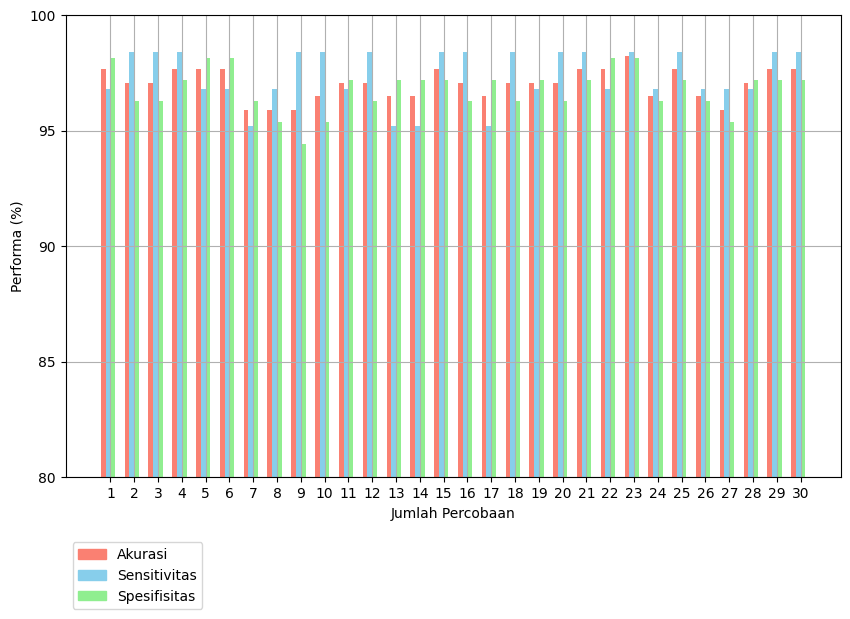

In [ ]:
#XGBoost

num_experiments = 30

accuracy = [0.9766, 0.9707, 0.9707, 0.9766, 0.9766, 0.9766, 0.9590, 0.9590, 0.9590, 0.9649,
0.9707, 0.9707, 0.9649, 0.9649, 0.9766, 0.9707, 0.9649, 0.9707, 0.9707, 0.9707,
0.9766, 0.9766, 0.9824, 0.9649, 0.9766, 0.9649, 0.9590, 0.9707, 0.9766, 0.9766]

sensitivity = [0.9682, 0.9841, 0.9841, 0.9841, 0.9682, 0.9682, 0.9523, 0.9682, 0.9841, 0.9841,
0.9682, 0.9841, 0.9523, 0.9523, 0.9841, 0.9841, 0.9523, 0.9841, 0.9682, 0.9841,
0.9841, 0.9682, 0.9841, 0.9682, 0.9841, 0.9682, 0.9682, 0.9682, 0.9841, 0.9841]

specificity = [0.9814, 0.9629, 0.9629, 0.9722, 0.9814, 0.9814, 0.9629, 0.9537, 0.9444, 0.9537,
0.9722, 0.9629, 0.9722, 0.9722, 0.9722, 0.9629, 0.9722, 0.9629, 0.9722, 0.9629,
0.9722, 0.9814, 0.9814, 0.9629, 0.9722, 0.9629, 0.9537, 0.9722, 0.9722, 0.9722]




# Mengonversi ke persentase
accuracy_percent = np.array(accuracy) * 100
sensitivity_percent = np.array(sensitivity) * 100
specificity_percent = np.array(specificity) * 100


# Membuat plot
plt.figure(figsize=(10, 6))

# Plot histogram untuk masing-masing metrik
bar_width = 0.2
index = np.arange(num_experiments)

plt.bar(index, accuracy_percent, bar_width, color='salmon', label='Akurasi')
plt.bar(index + bar_width, sensitivity_percent, bar_width, color='skyblue', label='Sensitivitas')
plt.bar(index + 2*bar_width, specificity_percent, bar_width, color='lightgreen', label='Spesifisitas')

plt.xlabel('Jumlah Percobaan')
plt.ylabel('Performa (%)')
plt.ylim(80, 100)  # Set batas sumbu y dari 80% hingga 100%
plt.yticks(np.arange(80, 101, 5))  # Tampilkan label pada sumbu y setiap 5%

# Menambahkan keterangan warna di bawah grafik
legend_labels = ['Akurasi', 'Sensitivitas', 'Spesifisitas']
colors = ['salmon', 'skyblue', 'lightgreen']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, loc='lower left', bbox_to_anchor=(0, -0.3))

plt.xticks(index + 1.5*bar_width, np.arange(1, num_experiments + 1))
plt.grid(True)
plt.show()